## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Get Files

In [3]:
# Data is available for download at https://data.ca.gov/dataset/covid-19-cases
files = [file for file in os.listdir('.\csv_files') if file.endswith('.csv')]
# Age Demographic vs Cases
age = pd.read_csv('.\csv_files\\' + files[0])
# Ethnicity Demographic vs Cases
ethnicity = pd.read_csv('.\csv_files\\' + files[1])
# Sex Demographic vs Cases
sex = pd.read_csv('.\csv_files\\' + files[2])
# Statewide Cases by County
state = pd.read_csv('.\csv_files\\' + files[3])

## Dataset 1: Find most deaths and case increases for the 4 months of the dataset

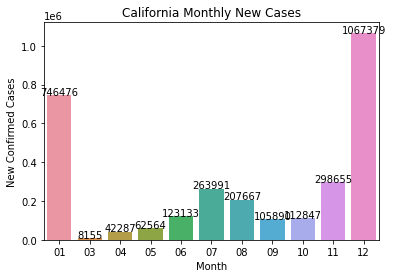

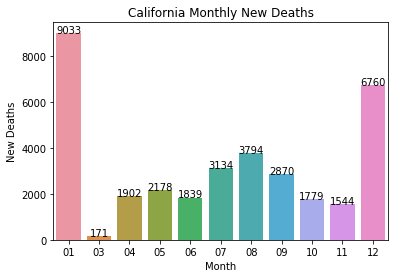

In [4]:
# Find the totals for California for each date
state_totals = state.groupby('date').sum()
state_totals.reset_index(inplace=True)
state_totals['month'] = state_totals['date'].str[5:7]
monthly_totals = state_totals.groupby('month').sum()
monthly_totals.reset_index(inplace=True)

# As predicted, July took cases by a large margin and August has less cases than July.
new_cases_plot = sns.barplot(x='month', y='newcountconfirmed', data=monthly_totals)
new_cases_plot.set(xlabel='Month', ylabel='New Confirmed Cases')
new_cases_plot.set_title('California Monthly New Cases')

for index, row in monthly_totals.iterrows():
    new_cases_plot.text(row.name, row.newcountconfirmed, row.newcountconfirmed, color='black', ha="center")
    
plt.show(new_cases_plot)

# Although cases have slowed, August still takes the new spot for most deaths
new_deaths_plot = sns.barplot(x='month', y='newcountdeaths', data=monthly_totals)
new_deaths_plot.set(xlabel='Month', ylabel='New Deaths')
new_deaths_plot.set_title('California Monthly New Deaths')

for index, row in monthly_totals.iterrows():
    new_deaths_plot.text(row.name, row.newcountdeaths, row.newcountdeaths, color='black', ha="center")

plt.show(new_deaths_plot)

## Dataset 2: Ages Groups Compared

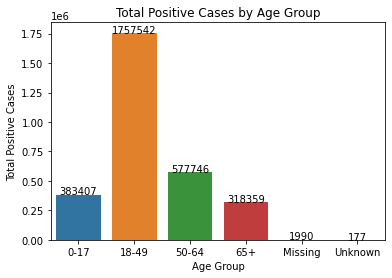

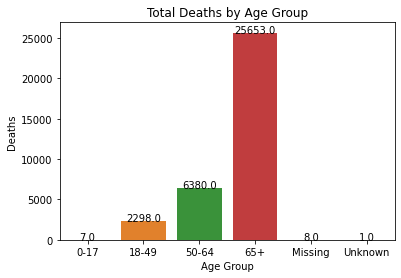

In [5]:
# This data isn't too helpful as the age range with the most
# cases also contains a majority of the ages.
# For some reason the data set has both '65 and older' and 65+,
# so we want to set them to be equal first before summing.
age['age_group'] = age['age_group'].str.replace('65 and Older', '65+')
age_totals = age.groupby('age_group').max().reset_index()
age_plot = sns.barplot(x='age_group', y='totalpositive', data=age_totals)
age_plot.set(xlabel='Age Group', ylabel='Total Positive Cases')
age_plot.set_title("Total Positive Cases by Age Group")

for index, row in age_totals.iterrows():
    age_plot.text(row.name, row.totalpositive, row.totalpositive, color='black', ha="center")
    
plt.show(age_plot)


# Children by far have the lowest amounts of deaths in California with a whopping 3 deaths total
# The results definitely suggest elderly patients with Covid have a higher mortality rate
age_death = sns.barplot(x='age_group', y='deaths', data=age_totals)
age_death.set(xlabel='Age Group', ylabel='Deaths')
age_death.set_title("Total Deaths by Age Group")

for index, row in age_totals.iterrows():
    age_death.text(row.name, row.deaths, row.deaths, color='black', ha="center")
    
plt.show(age_death)

## Dataset 3: Ethnicity variation

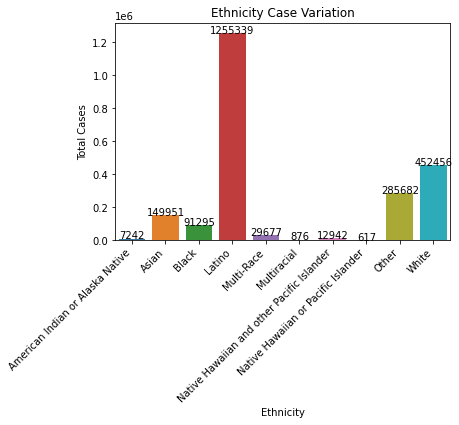

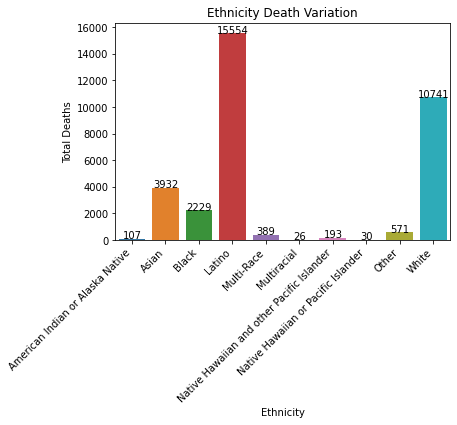

In [6]:
# The Latino community is greatly affected by the virus in comparison to all other
# ethnicities combined
eth_cases = ethnicity.groupby('race_ethnicity').max().reset_index()
eth_cases_plot = sns.barplot(x='race_ethnicity', y='cases', data=eth_cases)
eth_cases_plot.set_title('Ethnicity Case Variation')
eth_cases_plot.set(xlabel='Ethnicity', ylabel='Total Cases')

for index, row in eth_cases.iterrows():
    eth_cases_plot.text(row.name, row.cases, row.cases, color='black', ha="center")
    
plt.xticks(rotation=45, ha="right")
plt.show(eth_cases_plot)

# The Latino community is still the majority, but the white demographic also has deaths
# close to the levels of that of the Latino community.
eth_deaths_plot = sns.barplot(x='race_ethnicity', y='deaths', data=eth_cases)
eth_deaths_plot.set_title('Ethnicity Death Variation')
eth_deaths_plot.set(xlabel='Ethnicity', ylabel='Total Deaths')

for index, row in eth_cases.iterrows():
    eth_deaths_plot.text(row.name, row.deaths, row.deaths, color='black', ha="center")
    
plt.xticks(rotation=45, ha="right")
plt.show(eth_deaths_plot)


## Dataset 4: Differences in Sex

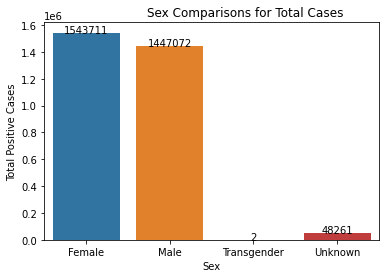

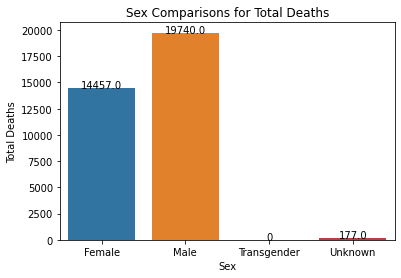

In [7]:
# Positive Cases between the sexes are about the same
sex_totals = sex.groupby('sex').max().reset_index()
sex_cases_plot = sns.barplot(x='sex', y='totalpositive2', data=sex_totals)
sex_cases_plot.set_title('Sex Comparisons for Total Cases', x=0.6)
sex_cases_plot.set(xlabel='Sex', ylabel='Total Positive Cases')

for index, row in sex_totals.iterrows():
    sex_cases_plot.text(row.name, row.totalpositive2, row.totalpositive2, color='black', ha="center")
    
plt.show(sex_cases_plot)

# However, deaths are more skewed towards males
sex_death_plot = sns.barplot(x='sex', y='deaths', data=sex_totals)
sex_death_plot.set_title('Sex Comparisons for Total Deaths')
sex_death_plot.set(xlabel='Sex', ylabel='Total Deaths')

for index, row in sex_totals.iterrows():
    if pd.notnull(row.deaths):
        sex_death_plot.text(row.name, row.deaths, row.deaths, color='black', ha="center")
    else:
        sex_death_plot.text(row.name, 0, 0, color='black', ha="center")
        
plt.show(sex_death_plot)